In [117]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [118]:
import pandas as pd

In [119]:
# Load the 'mcdonalds' dataset from the 'MSA' package
mcdonalds = pd.read_csv('mcdonalds.csv')

In [120]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [121]:
# Display the column names
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [122]:
mcdonalds.shape

(1453, 15)

In [123]:
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [124]:
import numpy as np

MD_x = np.array(mcdonalds[0:11]) == "Yes"
MD_x = MD_x.astype(int)
print(np.round(np.mean(MD_x, axis=0), 2))


[0.55 0.91 0.18 1.   0.64 0.91 0.64 0.64 0.55 0.27 0.27 0.   0.   0.
 0.  ]


In [125]:
import numpy as np
from sklearn.decomposition import PCA



MD_pca = PCA()
MD_pca.fit(MD_x)

print(f"Explained variance ratio: {MD_pca.explained_variance_ratio_}")
print(f"Singular values: {MD_pca.singular_values_}")

Explained variance ratio: [3.01760012e-01 2.73926567e-01 1.72048674e-01 1.11061657e-01
 8.22755672e-02 2.93930644e-02 1.53899233e-02 1.28878164e-02
 1.25671869e-03 2.63684017e-34 1.73769296e-34]
Singular values: [2.51187729e+00 2.39323118e+00 1.89667640e+00 1.52387607e+00
 1.31160486e+00 7.83952968e-01 5.67264758e-01 5.19107431e-01
 1.62101343e-01 7.42522261e-17 6.02773425e-17]


In [126]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [127]:

print(np.round(MD_pca.explained_variance_ratio_, decimals=1))

[0.3 0.3 0.2 0.1 0.1 0.  0.  0.  0.  0.  0. ]


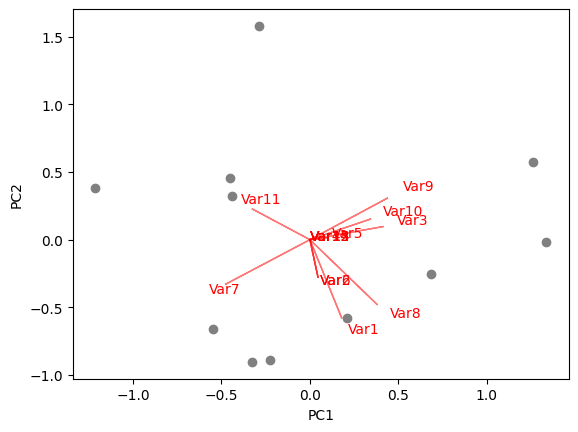

In [128]:
# Plot PCA results
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
# Project axes (similar to projAxes in R)
for i, (x, y) in enumerate(zip(MD_pca.components_[0], MD_pca.components_[1])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5)
    plt.text(x*1.2, y*1.2, f'Var{i+1}', color='r')
plt.show()

## Step 5 : Extracing Segments

In [129]:
# Set random seed
np.random.seed(1234)

# Perform KMeans clustering for k=2 to 8
MD_km28 = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    MD_km28.append(kmeans.fit(MD_x))

In [130]:
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from scipy.stats import bootstrap

In [131]:
# Assuming MD.km28 is a dictionary containing KMeans objects for different k values
plt.plot(list(MD_km28()), [model.inertia_ for model in MD_km28.values()])
plt.xlabel("number of segments")
plt.show()

TypeError: 'list' object is not callable

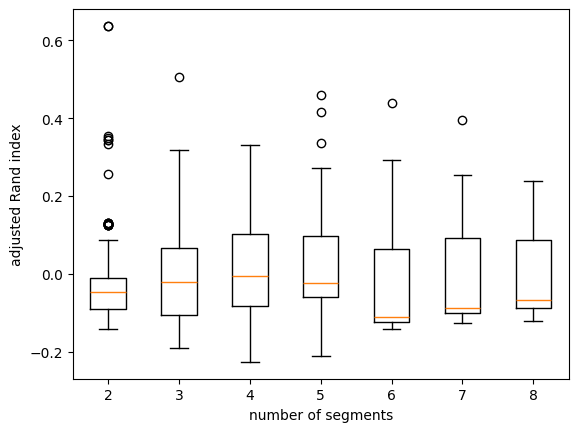

In [ ]:
np.random.seed(1234)

def boot_flexclust(data, k_range, nrep=10, nboot=100):
    results = {}
    for k in k_range:
        boot_scores = []
        for _ in range(nboot):
            boot_sample = data[np.random.choice(data.shape[0], size=data.shape[0], replace=True)]
            kmeans = KMeans(n_clusters=k, n_init=nrep)
            labels = kmeans.fit_predict(boot_sample)
            ari = adjusted_rand_score(labels, kmeans.fit_predict(data))
            boot_scores.append(ari)
        results[k] = boot_scores
    return results

MD_b28 = boot_flexclust(MD_x, range(2, 9))

plt.boxplot(MD_b28.values(), labels=MD_b28.keys())
plt.xlabel("number of segments")
plt.ylabel("adjusted Rand index")
plt.show()

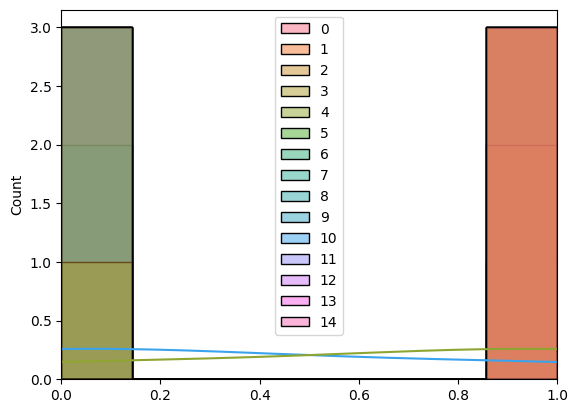

In [ ]:
sns.histplot(MD_x[MD_km28[4].labels_ == 0], kde=True)
plt.xlim(0, 1)
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [ ]:
MD_k4 = MD_km28[4]
MD_r4 = KMeans(n_clusters=4, random_state=42).fit(MD_x)


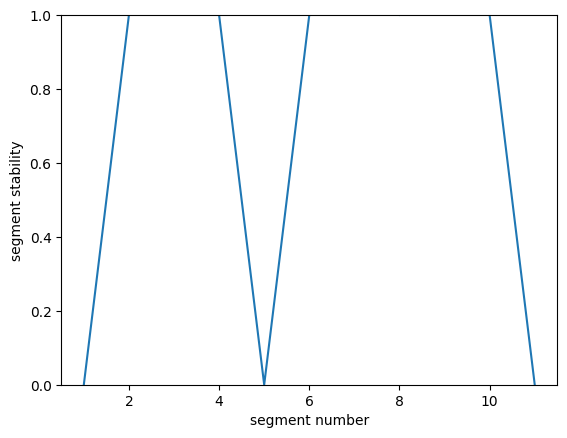

In [ ]:
#plt.figure(figsize=(10, 6))
plt.ylim(0, 1)
plt.xlabel("segment number")
plt.ylabel("segment stability")
plt.plot(range(1, len(MD_r4.labels_) + 1), MD_r4.labels_)
plt.show()

In [ ]:
# Flexmix equivalent using GaussianMixture
np.random.seed(1234)

def stepFlexmix(X, k_range, n_rep):
    models = []
    for k in k_range:
        best_model = None
        best_bic = np.inf
        for _ in range(n_rep):
            model = GaussianMixture(n_components=k, random_state=np.random.randint(1000))
            model.fit(X)
            if model.bic(X) < best_bic:
                best_model = model
                best_bic = model.bic(X)
        models.append(best_model)
    return models

MD_m28 = stepFlexmix(MD_x, range(2, 9), 10)

# Print summary of models
for i, model in enumerate(MD_m28):
    print(f"Model with {i+2} components: BIC = {model.bic(MD_x):.2f}")

Model with 2 components: BIC = -692.72
Model with 3 components: BIC = -568.98
Model with 4 components: BIC = -369.13
Model with 5 components: BIC = -96.17
Model with 6 components: BIC = 178.17
Model with 7 components: BIC = 455.96
Model with 8 components: BIC = 756.60


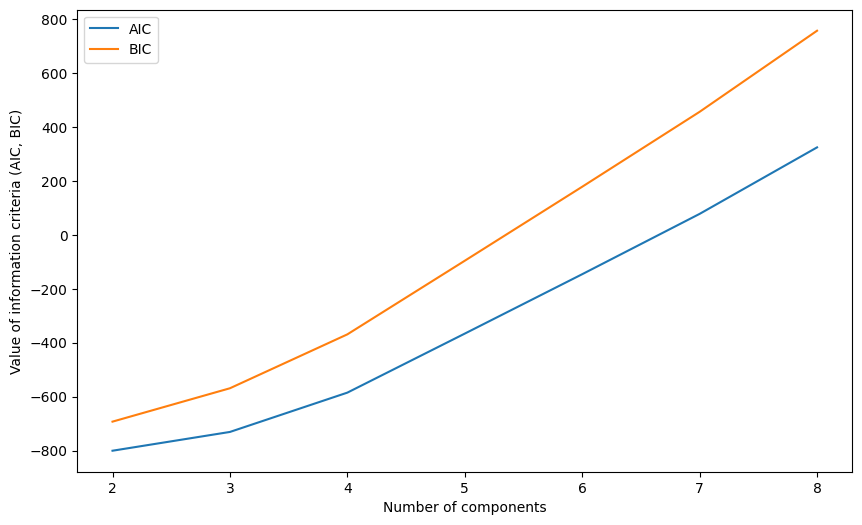

In [ ]:
# Plot information criteria
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), [m.aic(MD_x) for m in MD_m28], label='AIC')
plt.plot(range(2, 9), [m.bic(MD_x) for m in MD_m28], label='BIC')
plt.xlabel("Number of components")
plt.ylabel("Value of information criteria (AIC, BIC)")
plt.legend()
plt.show()

In [132]:
# Get model with 4 components
MD_m4 = MD_m28[2]  
# Index 2 corresponds to 4 components

# Create confusion matrix
kmeans_labels = MD_k4.labels_
mixture_labels = MD_m4.predict(MD_x)
confusion_matrix = np.zeros((4, 4), dtype=int)
for i in range(len(kmeans_labels)):
    confusion_matrix[kmeans_labels[i], mixture_labels[i]] += 1

print("Confusion Matrix:")
print(confusion_matrix)



IndexError: index 4 is out of bounds for axis 0 with size 4

In [ ]:
# Calculate Adjusted Rand Index
ari = adjusted_rand_score(kmeans_labels, mixture_labels)
print(f"Adjusted Rand Index: {ari:.4f}")

Adjusted Rand Index: 0.7105


In [ ]:
# Assuming MD.x, MD.k4, and mcdonalds are already defined

# Fit Gaussian Mixture Model
MD_m4a = GaussianMixture(n_components=len(np.unique(MD_k4)), random_state=0).fit(MD_x)

# Create contingency table
kmeans_clusters = MD_k4
mixture_clusters = MD_m4a.predict(MD_x)
contingency_table = pd.crosstab(kmeans_clusters, mixture_clusters)
print(contingency_table)

col_0                                                0
row_0                                                 
KMeans(n_clusters=6, n_init=10, random_state=1234)  11


In [ ]:
# Calculate log-likelihood for MD_m4a
print(MD_m4a.score(MD_x))

# Calculate log-likelihood for MD_m4 (assuming it's already defined)
print(MD_m4.score(MD_x))

# Reverse the table of 'Like' column
print(mcdonalds['Like'].value_counts().sort_index(ascending=False))

34.1122092243785
75.9629739792817
Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [ ]:
#import pandas as pd
from patsy import dmatrix
import statsmodels.formula.api as smf

model = smf.ols(formula='Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting', data=mcdonalds)
# Assuming 'mcdonalds' is a pandas DataFrame
columns = mcdonalds.columns[:11]
f = ' + '.join(columns)
f = f"Like.n ~ {f}"
f = dmatrix(f, mcdonalds)

print(f.design_info.describe())


PatsyError: Error evaluating factor: NameError: name 'Like_n' is not defined
    Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
    ^^^^^^

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

np.random.seed(1234)

# Assuming 'f' is the feature matrix and 'mcdonalds' is the dataset
X = mcdonalds[f]  # Replace 'f' with the actual feature column names

# Initialize and fit the Gaussian Mixture Model
MD_reg2 = GaussianMixture(n_components=2, n_init=10, random_state=1234, verbose=False)
MD_reg2.fit(X)

# Print summary of the model
print("Gaussian Mixture Model Summary:")
print(f"Number of components: {MD_reg2.n_components}")
print(f"Converged: {MD_reg2.converged_}")
print(f"Number of iterations: {MD_reg2.n_iter_}")
print(f"Lower bound: {MD_reg2.lower_bound_:.2f}")
print(f"AIC: {MD_reg2.aic():.2f}")
print(f"BIC: {MD_reg2.bic():.2f}")

KeyError: 'Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting'

## Step  6 : profiling Segment


In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming MD.x is already defined as a numpy array or pandas DataFrame
MD_vclust = linkage(np.transpose(MD_x), method='complete')

# Assuming MD.k4 is already defined
plt.figure(figsize=(10, 8))
sns.heatmap(MD_k4.iloc[:, ::-1], cmap='YlOrRd', cbar=False)
plt.title('Barchart')
plt.tight_layout()
plt.show()


AttributeError: 'KMeans' object has no attribute 'iloc'

<Figure size 1000x800 with 0 Axes>